# Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)

**Overview**: In this module, you get to do the actual ‘number crunching’ for your capstone project. Spend your time in this module creating and training your models, as well as creating visualizations to make sense of your findings. You will have time in Module 24 to clean the code and make your work presentable for technical and non-technical audiences; for now, you will do the ‘heavy lifting’ of finding the answer to your research question.

The only deliverables for this module will be the Jupyter Notebook(s) where you did your analysis and the updated README.md
Download README.md file with the results section completed. If you have changed methodologies or datasets since Module 17, please make sure to reflect those changes in the README.md Download README.md file as well 



### Grading

Please note that you will be awarded points based on this activity. You may refer to the rubric below to know more about the grading criteria.



### Grading Rubric

20 Pts - Learning Outcome Project Organization
· README file with a summary of findings and link to your Jupyter Notebook
· Jupyter Notebook with headings and text appropriately formatted
· Libraries are imported and aliased correctly
· Code does not contain errors
· No long strings of code output
· Demonstrates competency with pandas
· Demonstrates competency with seaborn
· Variables are sensible

	
20 pts - Learning Outcome Syntax and Code Quality
· Libraries are imported and aliased correctly
· Code does not contain errors
· No long strings of code output
· Demonstrates competency with pandas
· Demonstrates competency with seaborn
· Variables are sensible
	
	
20 pts - Learning Outcome Visualizations
· Appropriate plots for categorical and continuous variables are utilized
	
	
20 pts - Learning Outcome Modeling
· Use of multiple regression or classification models Cross-validation of models
· Grid Search hyperparameters
	
	

### Getting Started: Pull the Data

Use pandas to read in the dataset `MBA_Admissions.csv` and assign to a meaningful variable name.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.tsa.seasonal import _extrapolate_trend
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import time


In [6]:
mba = pd.read_csv('/Users/kimberlytulga/Documents/Executive Education Courses/Berkley HAAS - ML and AI Certificate/Module 20 - Captstone I/Dowloaded Data/MBA_Admissions.csv')

In [7]:
mba.set_index('application_id')

gender  international   gpa       major      race   gmat  \
application_id                                                             
1               Female          False  3.30    Business     Asian  620.0   
2                 Male          False  3.28  Humanities     Black  680.0   
3               Female           True  3.30    Business       NaN  710.0   
4                 Male          False  3.47        STEM     Black  690.0   
5                 Male          False  3.35        STEM  Hispanic  590.0   
...                ...            ...   ...         ...       ...    ...   
6190              Male          False  3.49    Business     White  640.0   
6191              Male          False  3.18        STEM     Black  670.0   
6192            Female           True  3.22    Business       NaN  680.0   
6193              Male           True  3.36    Business       NaN  590.0   
6194              Male          False  3.23        STEM  Hispanic  650.0   

                work_exp          work_industry admission  
application_id                                             
1                    3.0     Financial Services     Admit  
2                    5.0  Investment Management       NaN  
3                    5.0             Technology     Admit  
4                    6.0             Technology       NaN  
5                    5.0             Consulting       NaN  
...                  ...                    ...       ...  
6190                 5.0                  Other       NaN  
6191                 4.0             Consulting       NaN  
6192                 5.0            Health Care     Admit  
6193                 5.0                  Other       NaN  
6194                 4.0             Consulting       NaN  

[6194 rows x 9 columns]

### 2.) Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# MBA Applicant data:
1 - application_id: Unique identifier for each application
2 - gender: Applicant's gender (Male, Female)
3 - international: International student (TRUE/FALSE)
4 - gpa: Grade Point Average of the applicant (on 4.0 scale)
5 - major: Undergraduate major (Business, STEM, Humanities)
6 - race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
7 - gmat: GMAT score of the applicant (800 points)
8 - work_exp: Number of years of work experience (Year)
9 - work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)

Output variable (desired target):
10 - admission: Admission status (Admit, Waitlist, Null: Deny)
```



In [9]:
mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [10]:
mba['race'] = mba['race'].fillna('International').astype('str')
mba['admission'] = mba['admission'].fillna('Deny').astype('str')

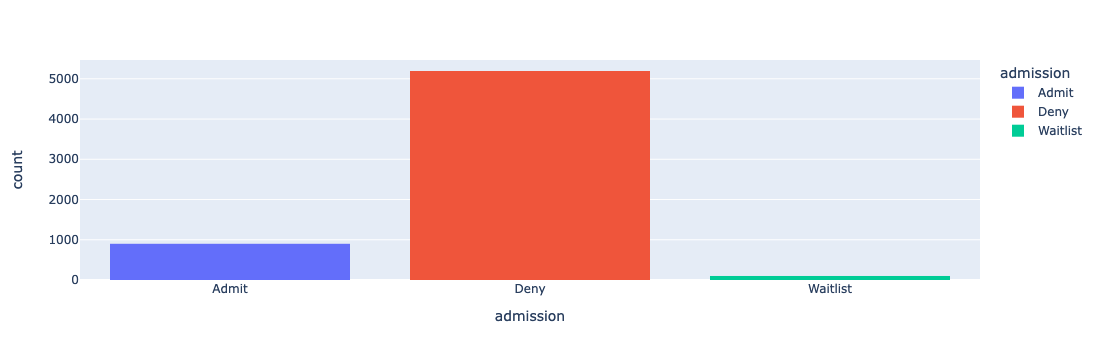

In [11]:
px.histogram(mba, x='admission', color='admission')

In [12]:
mba_2 = mba.copy()

In [13]:
# Importing LabelEncoder from Sklearn library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label encoder and return encoded label
gender_label = le.fit_transform(mba_2['gender'])
major_label = le.fit_transform(mba_2['major'])
race_label = le.fit_transform(mba_2['race'])
industry_label = le.fit_transform(mba_2['work_industry'])


# removing each column from df as it is of no use now.
mba_2.drop('gender', axis=1, inplace=True)
mba_2.drop('major', axis=1, inplace=True)
mba_2.drop('race', axis=1, inplace=True)
mba_2.drop('work_industry', axis=1, inplace=True)


# Appending the array to our dataFrame with each column name 
mba_2['gender'] = gender_label
mba_2['major'] = major_label
mba_2['race'] = race_label
mba_2['work_industry'] = industry_label



# printing Dataframe
mba_2.sample(10)

application_id  international   gpa   gmat  work_exp admission  gender  \
1347            1348           True  3.20  720.0       6.0      Deny       0   
4642            4643          False  3.22  610.0       4.0      Deny       0   
6109            6110           True  3.42  660.0       7.0     Admit       0   
3553            3554          False  3.37  650.0       7.0      Deny       0   
97                98           True  3.36  690.0       5.0      Deny       1   
431              432          False  3.56  710.0       6.0      Deny       1   
3469            3470           True  3.38  670.0       5.0      Deny       1   
1082            1083           True  3.18  570.0       3.0      Deny       0   
5066            5067          False  3.44  650.0       5.0      Deny       1   
4782            4783          False  3.36  650.0       5.0      Deny       1   

      major  race  work_industry  
1347      1     3              8  
4642      1     5              1  
6109      1     3              1  
3553      0     1              4  
97        2     3              0  
431       2     5             13  
3469      2     3              5  
1082      0     3             13  
5066      1     5             13  
4782      1     0             13

In [14]:
waitlist = mba[mba['admission'] == 'Waitlist']

In [15]:
df = mba_2.drop(waitlist.index)

In [16]:
df['admit'] = df['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

In [17]:
df = df.drop(['international','admission'], axis = 1)

In [18]:
df.describe()

application_id          gpa         gmat     work_exp       gender  \
count     6094.000000  6094.000000  6094.000000  6094.000000  6094.000000   
mean      3111.784706     3.249683   650.723663     5.018707     0.638825   
std       1783.285010     0.151626    49.348802     1.033166     0.480381   
min          1.000000     2.650000   570.000000     1.000000     0.000000   
25%       1578.250000     3.150000   610.000000     4.000000     0.000000   
50%       3114.500000     3.250000   650.000000     5.000000     1.000000   
75%       4654.750000     3.350000   680.000000     6.000000     1.000000   
max       6194.000000     3.770000   780.000000     9.000000     1.000000   

             major         race  work_industry        admit  
count  6094.000000  6094.000000    6094.000000  6094.000000  
mean      1.003610     2.559895       6.094191     0.147686  
std       0.774398     1.770968       4.235167     0.354818  
min       0.000000     0.000000       0.000000     0.000000  
25%       0.000000     1.000000       1.000000     0.000000  
50%       1.000000     3.000000       5.000000     0.000000  
75%       2.000000     4.000000      10.000000     0.000000  
max       2.000000     5.000000      13.000000     1.000000

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6094 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6094 non-null   int64  
 1   gpa             6094 non-null   float64
 2   gmat            6094 non-null   float64
 3   work_exp        6094 non-null   float64
 4   gender          6094 non-null   int64  
 5   major           6094 non-null   int64  
 6   race            6094 non-null   int64  
 7   work_industry   6094 non-null   int64  
 8   admit           6094 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 476.1 KB


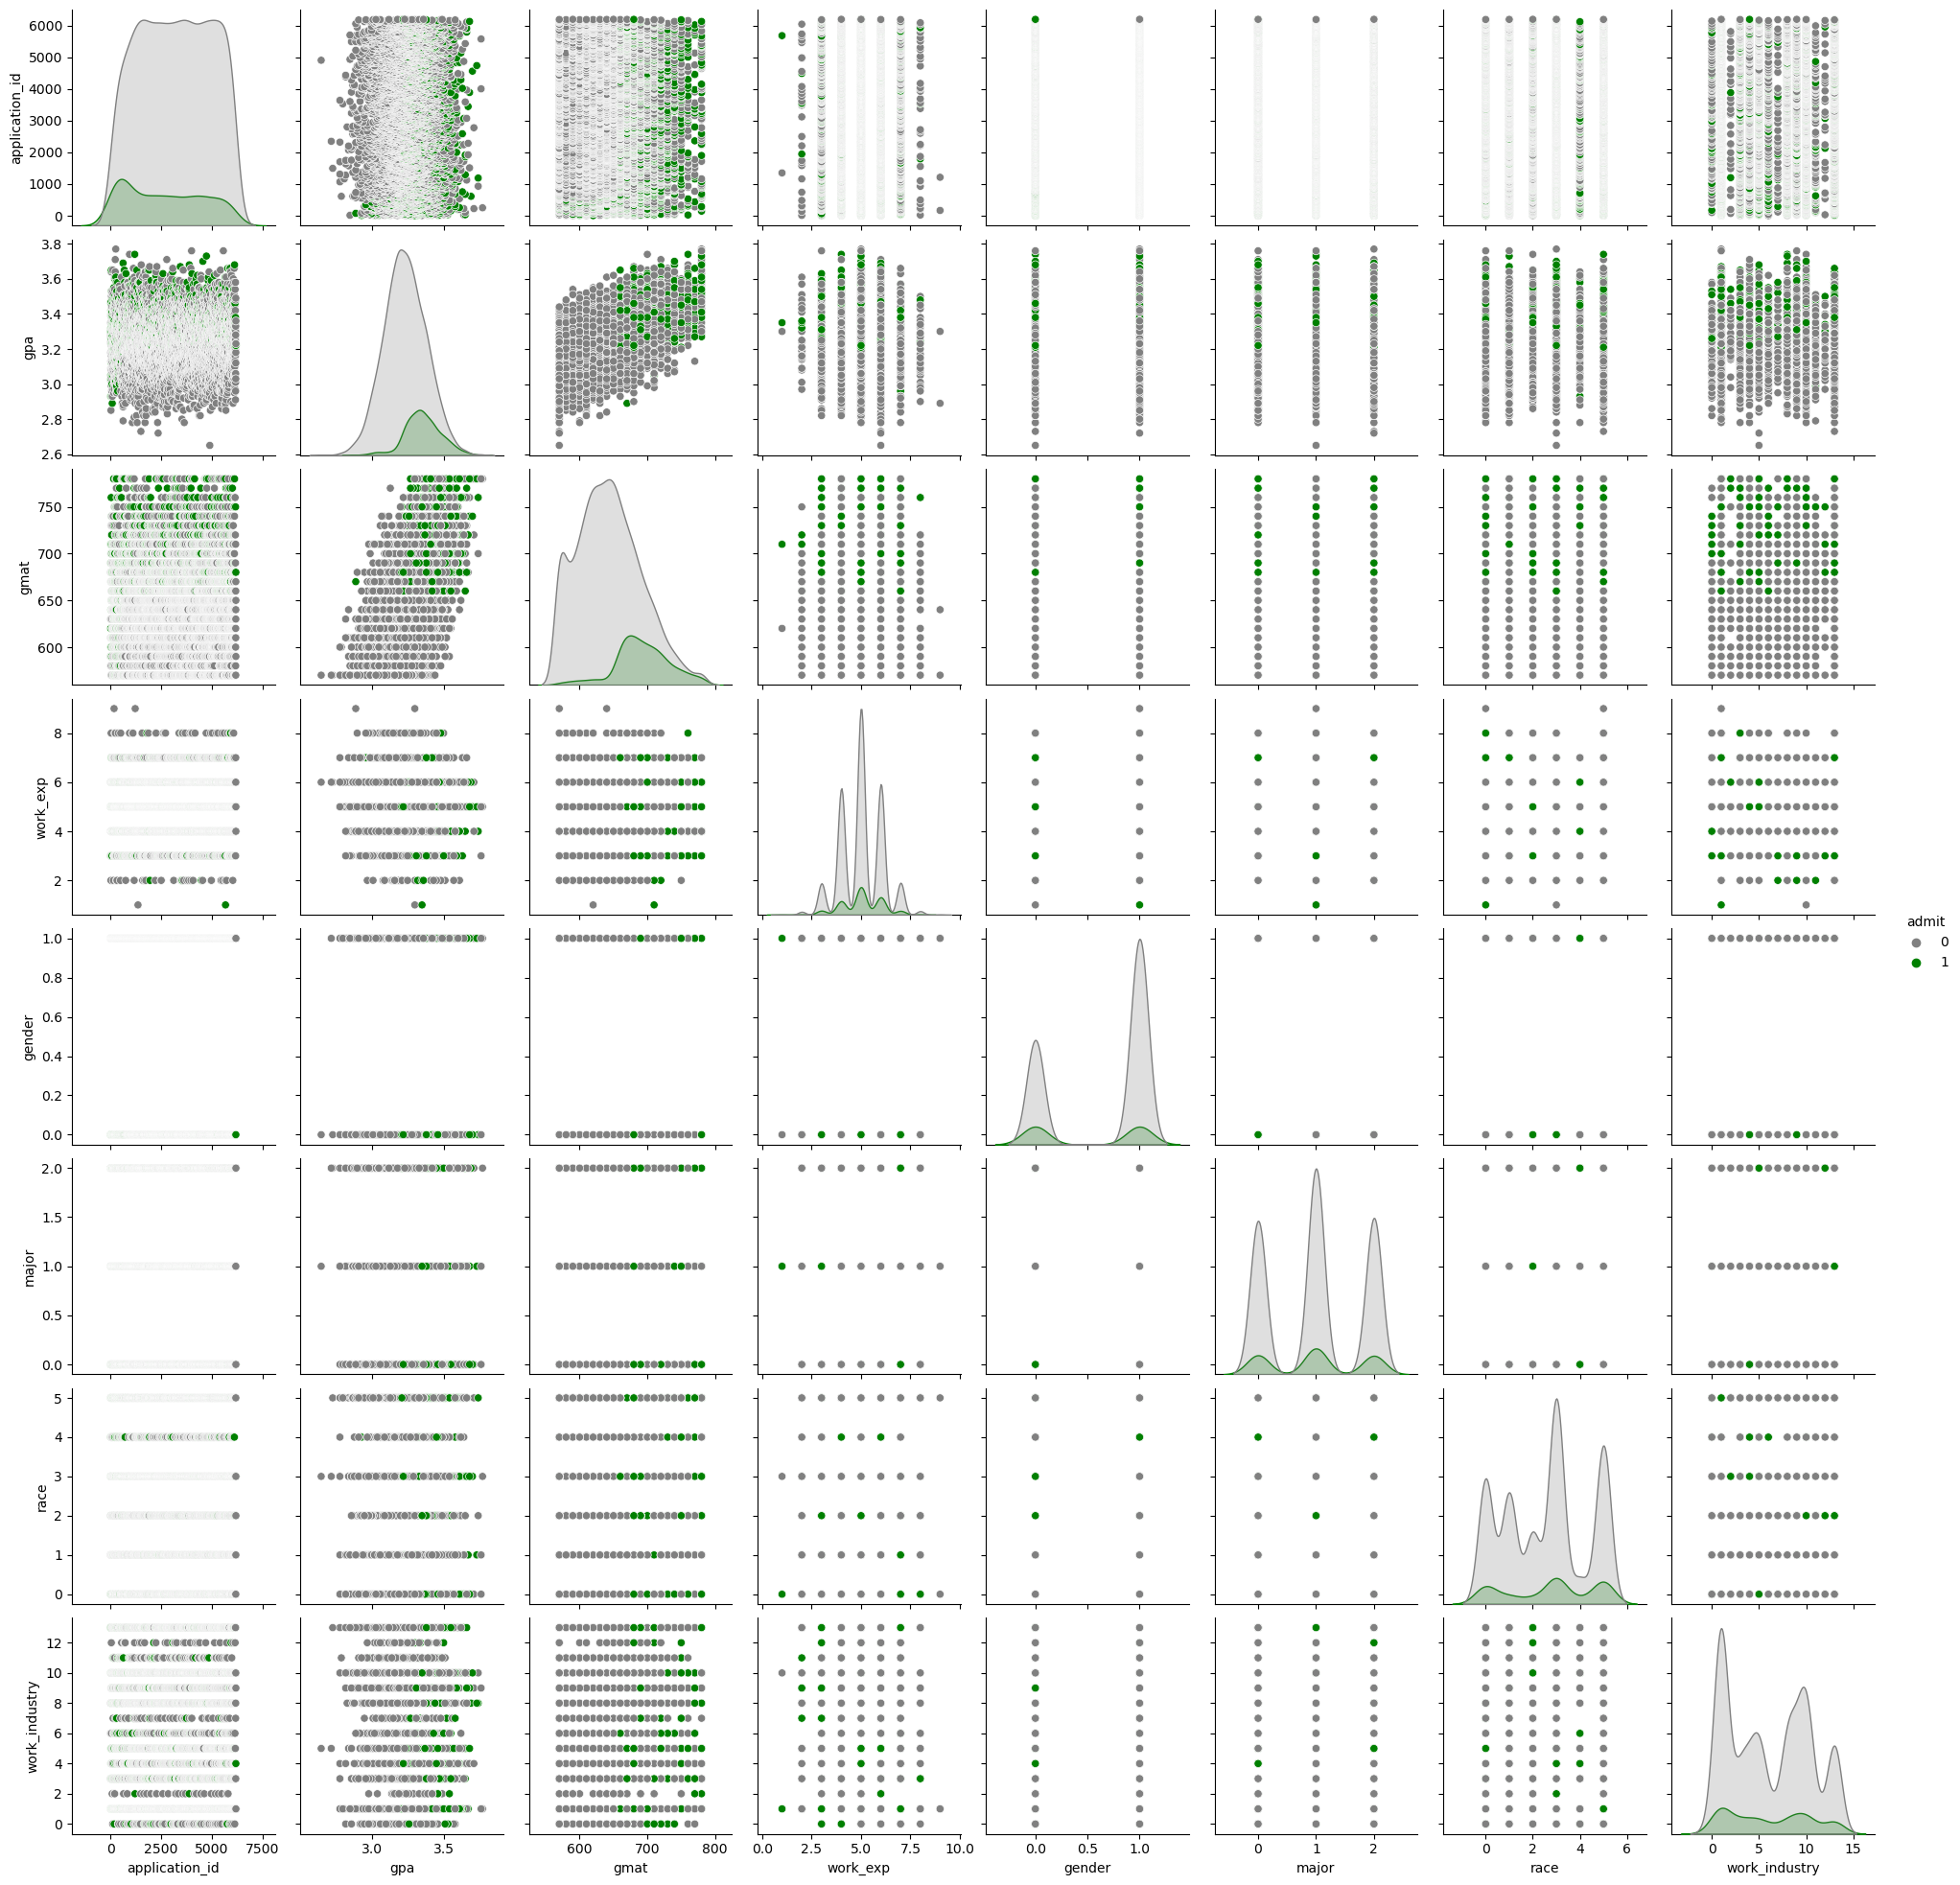

In [21]:
palette = {0: 'grey', 1: 'green'}
sns.pairplot(df, hue='admit', palette = palette)
plt.show()

### 4.) Train/Test Split

In [23]:
X = df.drop('admit', axis = 1)
y = df['admit']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = .2, random_state=22, stratify = y)

### 5.) Model Comparisons

Comparing the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models using the default settings.

In [25]:
lgr_pipe = Pipeline([ ('scaler', StandardScaler()),
                          ('lgr', LogisticRegression())])

lgr_start_time = time.time()
lgr_model = lgr_pipe.fit(X_train, y_train)
lgr_train_score = lgr_model.score(X_train, y_train)
lgr_test_score = lgr_model.score(X_test, y_test)
lgr_time = time.time() - lgr_start_time

# ANSWER CHECK
print(f'Logistic Regression Fitting Time: {lgr_time}')
print(f'Logistic Regression Train Score: {lgr_train_score}')
print(f'Logistic Regression Test Score: {lgr_test_score}')

Logistic Regression Fitting Time: 0.025166988372802734
Logistic Regression Train Score: 0.8531282051282051
Logistic Regression Test Score: 0.8342904019688269


In [26]:
knn_start_time = time.time()
knn_model =  KNeighborsClassifier().fit(X_train, y_train)
knn_train_score = knn_model.score(X_train, y_train)
knn_test_score = knn_model.score(X_test, y_test)
knn_time = time.time() - knn_start_time


print(f'K-N Neighbors Fitting Time: {knn_time}')
print(f'K-N Neighbors Train Score: {knn_train_score}')
print(f'K-N Neighbors Test Score: {knn_test_score}')

K-N Neighbors Fitting Time: 0.3257942199707031
K-N Neighbors Train Score: 0.8744615384615385
K-N Neighbors Test Score: 0.8244462674323215


In [27]:
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)
dt_time = time.time() - dt_start_time

print(f'Decision Tree Fitting Time: {dt_time}')
print(f'Decision Tree Train Score: {dt_train_score}')
print(f'Decision Tree Test Score: {dt_test_score}')

Decision Tree Fitting Time: 0.020511865615844727
Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.8187038556193601


In [28]:
svc_start_time = time.time()
svc_model = SVC().fit(X_train, y_train)
svc_train_score = svc_model .score(X_train, y_train)
svc_test_score = svc_model .score(X_test, y_test)
svc_time = time.time() - svc_start_time


print(f'SVM Fitting Time: {svc_time}')
print(f'SVM Train Score: {svc_train_score}')
print(f'SVM Test Score: {svc_test_score}')

SVM Fitting Time: 1.288343906402588
SVM Train Score: 0.8523076923076923
SVM Test Score: 0.85233798195242


In [29]:
res_dict = {'Model': ['KNN', 'Logistic Regression', 'SVC', 'Decision Tree'],
           'Train score': [knn_train_score, lgr_train_score, svc_train_score, dt_train_score],
           'Test score': [knn_test_score, lgr_test_score, svc_test_score, dt_test_score],
           'Average fit time': [knn_time, lgr_time, svc_time, dt_time]}
results_df = pd.DataFrame(res_dict).set_index('Model')
print(results_df)

                     Train score  Test score  Average fit time
Model                                                         
KNN                     0.874462    0.824446          0.325794
Logistic Regression     0.853128    0.834290          0.025167
SVC                     0.852308    0.852338          1.288344
Decision Tree           1.000000    0.818704          0.020512


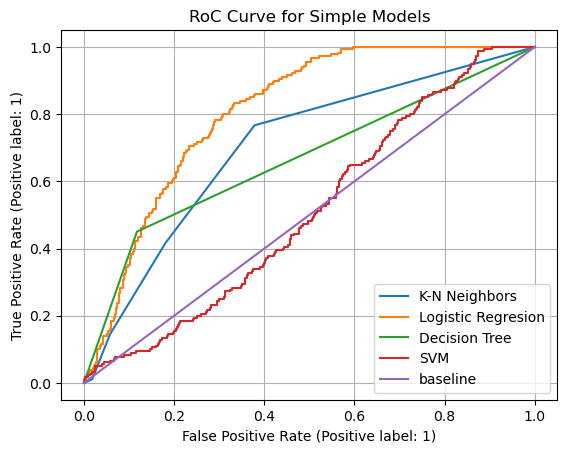

In [30]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_model, X_test, y_test,  ax = ax, label = 'K-N Neighbors')
RocCurveDisplay.from_estimator(lgr_model, X_test, y_test,  ax = ax, label = 'Logistic Regresion')
RocCurveDisplay.from_estimator(dt_model, X_test, y_test,  ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, ax = ax, label = 'SVM')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('RoC Curve for Simple Models')
plt.legend();

### 6.) Finding the most important features


In [32]:
# Building a Ridge Model
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])


ridge_start_time = time.time()
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
best_ridge_model = ridge_grid.best_estimator_.named_steps['ridge']
ridge_coefs = best_ridge_model.coef_
ridge_time = time.time() - ridge_start_time

print(f'Ridge Fitting Time: {ridge_time}')

Ridge Fitting Time: 1.690457820892334


In [33]:
#Ranking most relevant features

ridge_df = pd.DataFrame({'feature': X_train.columns, 'coef': ridge_coefs})
ridge_df = ridge_df.loc[ridge_df['coef'] != 0]
ridge_sorted = ridge_df.reindex(ridge_df['coef'].abs().sort_values(ascending=False).index)
ridge_sorted 

feature      coef
2            gmat  0.105394
4          gender -0.044487
1             gpa  0.043777
0  application_id -0.036945
6            race  0.013942
7   work_industry -0.002617
3        work_exp  0.002532
5           major -0.001315

In [34]:
C = np.logspace(-1.2,-0.5)

coef = np.empty((len(C),8))
for i, c in enumerate(C):
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear').fit(X_train, y_train)
    coef[i] = lr.coef_

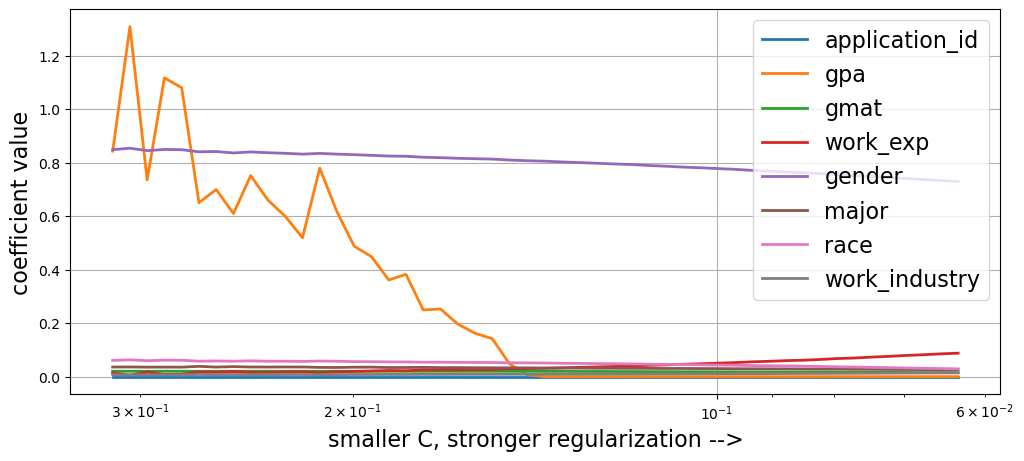

In [35]:
plt.figure(figsize=(12,5))
plt.semilogx(C,abs(coef),linewidth=2)
plt.gca().invert_xaxis()
plt.grid()
plt.legend(X.columns,fontsize=16)
plt.xlabel('smaller C, stronger regularization -->' , fontsize=16)
plt.ylabel('coefficient value', fontsize=16)
plt.show()

### 7.) Improving the Model


In [37]:
params1= {'poly__degree': list(range(1, 6, 1))}
lgr_pipe = Pipeline([('scale', StandardScaler()),
                     ('poly', PolynomialFeatures()),
                 ('lgr', LogisticRegression(multi_class='multinomial'))
                  ])

lgr_start_time = time.time()
lgr_grid = GridSearchCV(lgr_pipe, param_grid=params1, scoring = 'accuracy', cv = 5)
lgr_grid.fit(X_train, y_train)
lgr_train_preds = lgr_grid.predict(X_train)
lgr_test_preds = lgr_grid.predict(X_test)
lgr_time = time.time() - lgr_start_time
lgr_best_params = lgr_grid.best_params_


# ANSWER CHECK
print(f'Logistic Regression Fitting Time: {lgr_time}')
print(f'Logistic Regression Best Model: {lgr_best_params}')
print(f'Logistic Regression Train Score: {lgr_train_score}')
print(f'Logistic Regression Test Score: {lgr_test_score}')

Logistic Regression Fitting Time: 15.955368280410767
Logistic Regression Best Model: {'poly__degree': 2}
Logistic Regression Train Score: 0.8531282051282051
Logistic Regression Test Score: 0.8342904019688269


In [38]:
params2= {'knn__n_neighbors': list(range(1, 22, 2)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': [1, 2]}

knn_start_time = time.time()
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_pipe, param_grid=params2, scoring = 'accuracy', cv = 5)
knn_grid.fit(X_train, y_train)
knn_train_score = knn_grid.score(X_train, y_train)
knn_test_score = knn_grid.score(X_test, y_test)
knn_time = time.time() - knn_start_time
knn_best_params = knn_grid.best_params_


print(f'K-N Neighbors Fitting Time: {knn_time}')
print(f'K-N Neighbors Best Model: {knn_best_params}')
print(f'K-N Neighbors Train Score: {knn_train_score}')
print(f'K-N Neighbors Test Score: {knn_test_score}')

K-N Neighbors Fitting Time: 16.75666093826294
K-N Neighbors Best Model: {'knn__n_neighbors': 21, 'knn__p': 1, 'knn__weights': 'distance'}
K-N Neighbors Train Score: 1.0
K-N Neighbors Test Score: 0.8539786710418376


In [39]:
dt_start_time = time.time()
params3 = {'dtree__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'dtree__max_depth': [2, 5, 10],
         'dtree__min_samples_split': [0.1, 0.2, 0.05]}
dt_pipe = Pipeline([('scale', StandardScaler()), ('dtree', DecisionTreeClassifier(random_state = 22))])
dt_grid = GridSearchCV(dt_pipe, param_grid=params3, scoring = 'accuracy', cv = 5).fit(X_train, y_train)
dt_train_score = dt_grid.score(X_train, y_train)
dt_test_score = dt_grid.score(X_test, y_test)
dt_time = time.time() - dt_start_time
dt_best_params = dt_grid.best_params_

print(f'Decision Tree Fitting Time: {dt_time}')
print(f'Decision Tree Best Model: {dt_best_params}')
print(f'Decision Tree Train Score: {dt_train_score}')
print(f'Decision Tree Test Score: {dt_test_score}')

Decision Tree Fitting Time: 1.6548690795898438
Decision Tree Best Model: {'dtree__max_depth': 2, 'dtree__min_impurity_decrease': 0.01, 'dtree__min_samples_split': 0.1}
Decision Tree Train Score: 0.8523076923076923
Decision Tree Test Score: 0.85233798195242


In [40]:
svc_start_time = time.time()
params4= {'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_pipe = Pipeline([('scale', StandardScaler()), ('svc', SVC())])
svc_grid = GridSearchCV(svc_pipe, param_grid=params4, scoring = 'accuracy', cv = 5)
svc_grid.fit(X_train, y_train)
svc_train_score = svc_grid.score(X_train, y_train)
svc_test_score = svc_grid.score(X_test, y_test)
svc_time = time.time() - svc_start_time
svc_best_params = svc_grid.best_params_


print(f'SVM Fitting Time: {svc_time}')
print(f'SVM Best Model: {svc_best_params}')
print(f'SVM Train Score: {svc_train_score}')
print(f'SVM Test Score: {svc_test_score}')

SVM Fitting Time: 6.832827806472778
SVM Best Model: {'svc__kernel': 'rbf'}
SVM Train Score: 0.8709743589743589
SVM Test Score: 0.8556193601312552


In [41]:
res_dict2 = {'Model': ['KNN', 'Logistic Regression', 'SVC', 'Decision Tree'],
            'Average fit time': [knn_time, lgr_time, svc_time, dt_time],
           'Train score': [knn_train_score, lgr_train_score, svc_train_score, dt_train_score],
           'Test score': [knn_test_score, lgr_test_score, svc_test_score, dt_test_score],
           'Best Model Parameters': [knn_best_params, lgr_best_params, svc_best_params, dt_best_params]}
results_df2 = pd.DataFrame(res_dict2).set_index('Model')
print(results_df2)

                     Average fit time  Train score  Test score  \
Model                                                            
KNN                         16.756661     1.000000    0.853979   
Logistic Regression         15.955368     0.853128    0.834290   
SVC                          6.832828     0.870974    0.855619   
Decision Tree                1.654869     0.852308    0.852338   

                                                 Best Model Parameters  
Model                                                                   
KNN                  {'knn__n_neighbors': 21, 'knn__p': 1, 'knn__we...  
Logistic Regression                                {'poly__degree': 2}  
SVC                                             {'svc__kernel': 'rbf'}  
Decision Tree        {'dtree__max_depth': 2, 'dtree__min_impurity_d...  


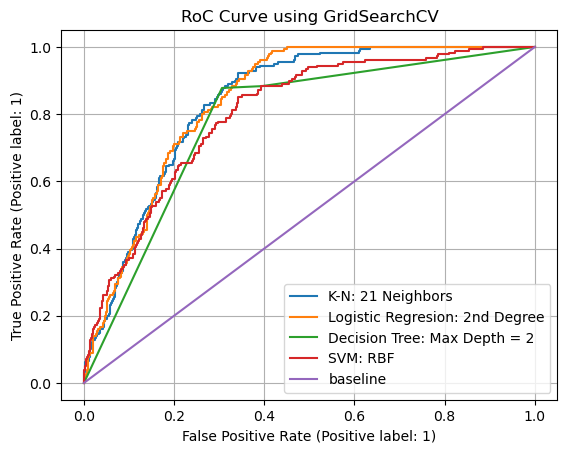

In [42]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test,  ax = ax, label = 'K-N: 21 Neighbors')
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test,  ax = ax, label = 'Logistic Regresion: 2nd Degree')
RocCurveDisplay.from_estimator(dt_grid, X_test, y_test,  ax = ax, label = 'Decision Tree: Max Depth = 2')
RocCurveDisplay.from_estimator(svc_grid, X_test, y_test, ax = ax, label = 'SVM: RBF')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('RoC Curve using GridSearchCV')
plt.legend();

The RoC Curve shows clear advantage of the Logistic Regression over the other predictive models. 

### 8.) Selecting the Best Model

In [45]:
#Build Decision Tree Confusion Matrix
dt_preds = dt_grid.best_estimator_.predict(X_test)
dt_confusion_mat = confusion_matrix(y_test, dt_preds, labels=[1, 0])
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_mat, display_labels=['Admitted', 'Rejected'])

#Build Logistic Regression Confusion Matrix
lgr_preds = lgr_grid.best_estimator_.predict(X_test)
lgr_confusion_mat = confusion_matrix(y_test, lgr_preds, labels=[1, 0])
lgr_disp = ConfusionMatrixDisplay(confusion_matrix=lgr_confusion_mat, display_labels=['Admitted', 'Rejected'])

#Build K-N Neighbors Confusion Matrix
knn_preds = knn_grid.best_estimator_.predict(X_test)
knn_confusion_mat = confusion_matrix(y_test, knn_preds, labels=[1, 0])
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat, display_labels=['Admitted', 'Rejected'])

#Build Support Vector Classifier Confusion Matrix
svc_preds = svc_grid.best_estimator_.predict(X_test)
svc_confusion_mat = confusion_matrix(y_test, svc_preds, labels=[1, 0])
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_mat, display_labels=['Admitted', 'Rejected'])


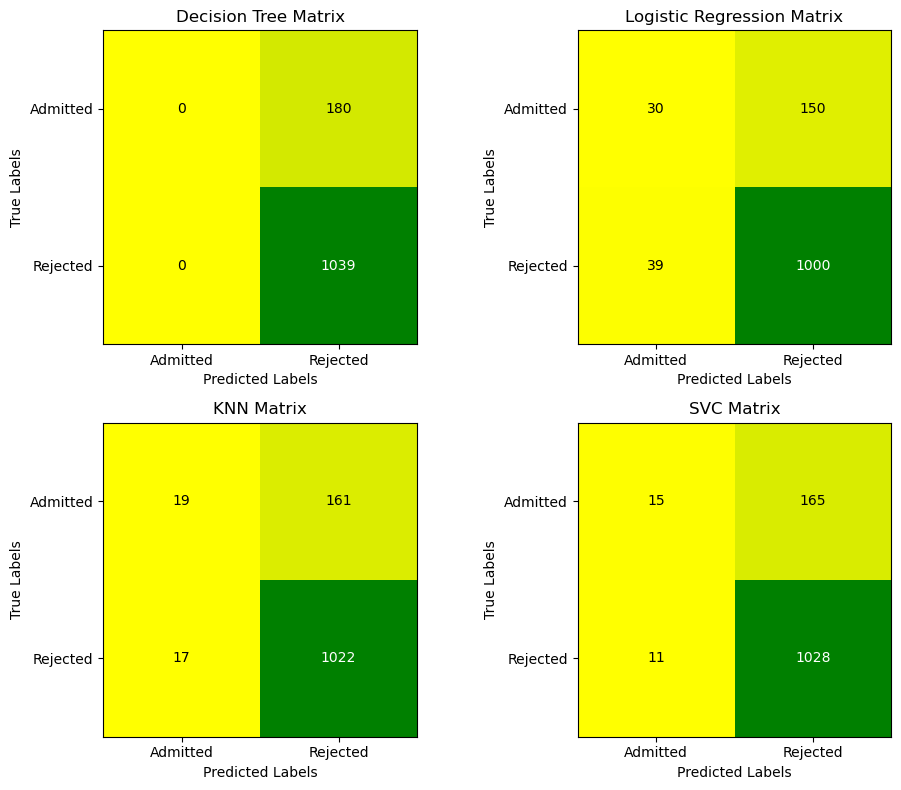

In [46]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# List of confusion matrices and subplot titles
cm_list = [dt_confusion_mat, lgr_confusion_mat, knn_confusion_mat, svc_confusion_mat]
titles = ['Decision Tree Matrix', 'Logistic Regression Matrix', 'KNN Matrix', 'SVC Matrix']

tick_labels = ['Admitted', 'Rejected']

# Create a custom colormap (grey to green)
cmap = LinearSegmentedColormap.from_list('greygreen', ['yellow', 'green'])

# Loop over axes and confusion matrices to create subplots
for ax, cm, title in zip(axes.ravel(), cm_list, titles):
    # Use `imshow` to display the confusion matrix as an image
    cax = ax.imshow(cm, interpolation='nearest', cmap = cmap) #plt.cm.Blues
    ax.set_title(title)
    
    # Add colorbar
    #fig.colorbar(cax, ax=ax)

    # Add axis labels
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    # Set the tick marks and labels
    ax.set_xticks([0, 1])  # X axis at 0 and 1 (for Admitted/Rejected)
    ax.set_yticks([0, 1])  # Y axis at 0 and 1 (for Admitted/Rejected)
    ax.set_xticklabels(tick_labels)  # Set custom labels for x-axis
    ax.set_yticklabels(tick_labels)  # Set custom labels for y-axis
    
    # Add text annotations inside the heatmap
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

In [47]:
dt_recall = recall_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

lgr_recall = recall_score(y_test, lgr_preds)
lgr_precision = precision_score(y_test, lgr_preds)
lgr_accuracy = accuracy_score(y_test, lgr_preds)

knn_recall = recall_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

svc_recall = recall_score(y_test, svc_preds)
svc_precision = precision_score(y_test, svc_preds)
svc_accuracy = accuracy_score(y_test, svc_preds)

In [48]:
score_dict = {'Model': ['Decision Tree','LogisticRegression', 'KNN',  'SVC'],
              'Fit Time': [dt_time, lgr_time, knn_time, svc_time],
              'Accuracy Score': [dt_accuracy, lgr_accuracy, knn_accuracy, svc_accuracy],
           'Precision Score': [dt_precision, lgr_precision, knn_precision, svc_precision],
           'Recall Score': [dt_recall, lgr_recall, knn_recall, svc_recall],
           }
score_df = pd.DataFrame(score_dict).set_index('Model')
print(score_df)

                     Fit Time  Accuracy Score  Precision Score  Recall Score
Model                                                                       
Decision Tree        1.654869        0.852338         0.000000      0.000000
LogisticRegression  15.955368        0.844955         0.434783      0.166667
KNN                 16.756661        0.853979         0.527778      0.105556
SVC                  6.832828        0.855619         0.576923      0.083333


### 9.) Predicting admissions for Waitlisted Applicants
Using the best method, Logistic Regression, predict what might happen to students who were waitlisted

In [50]:
waitlist_df = mba_2.iloc[waitlist.index].drop(['admission','international'], axis = 1)

In [51]:
waitlist_preds = lgr_grid.best_estimator_.predict(waitlist_df)

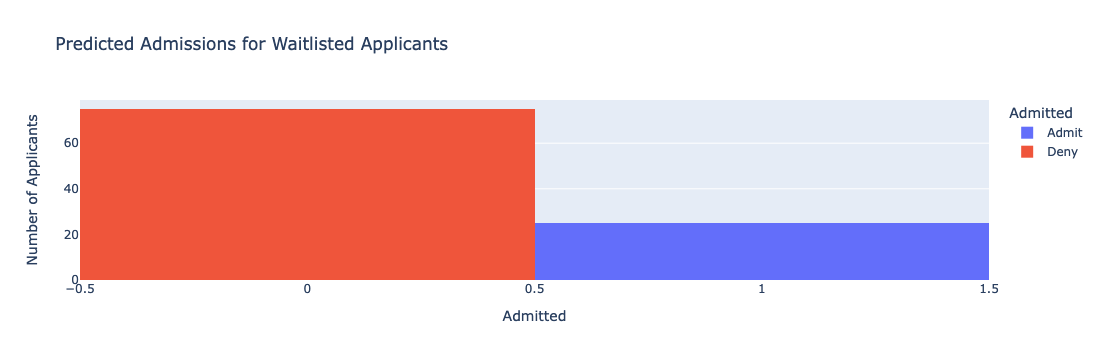

In [52]:
fig = px.histogram(waitlist_preds, color=waitlist_preds, title="Predicted Admissions for Waitlisted Applicants")

fig.update_layout(
    xaxis_title="Admitted",
    yaxis_title="Number of Applicants",
    legend_title='Admitted'
)
fig.for_each_trace(lambda trace: trace.update(name='Deny' if trace.name == '0' else 'Admit'))

fig.show()



In [53]:
waitlist_df['Admission Probability'] = lgr_grid.best_estimator_.predict_proba(waitlist_df)[:,1]

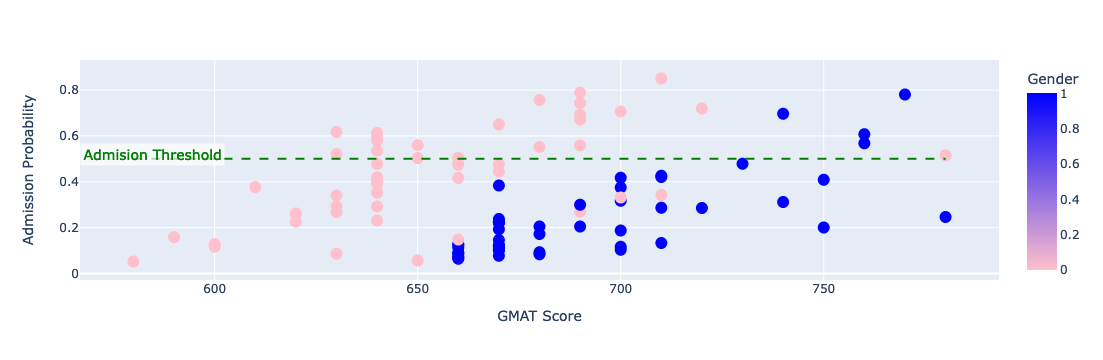

In [54]:
fig2 = px.scatter(waitlist_df, x='gmat', y='Admission Probability', color='gender')

fig2.update_traces(marker=dict(size=12),  # Customize marker size
                  selector=dict(mode='markers'))

fig2.update_layout(
     xaxis_title='GMAT Score',
    yaxis_title='Admission Probability',
    coloraxis=dict(
        colorscale=['pink', 'blue'],  
        colorbar=dict(title='Gender')  
    ),
    legend_title='Gender'  
)

# Add a dashed green line at y=0.5 as Admissions Threshold
fig2.add_shape(
    type="line",  
    x0=waitlist_df['gmat'].min(), x1=waitlist_df['gmat'].max(),   
    y0=0.5, y1=0.5,  
    line=dict(
        color="green",  
        width=2,       
        dash="dash"    
    )
)

fig2.add_annotation(
    text="Admision Threshold",  
    xref="paper", yref="y",  
    x=0.0, y=0.52, 
    showarrow=False,  
    font=dict(size=14, color="green"),  
    align="center",  
    bgcolor="rgba(255, 255, 255, 0.7)"  # Background color of the text box for better visibility
)


fig2.show()

### 10.) Re-examining the originial data and taking closer look into GMAT vs. Gender

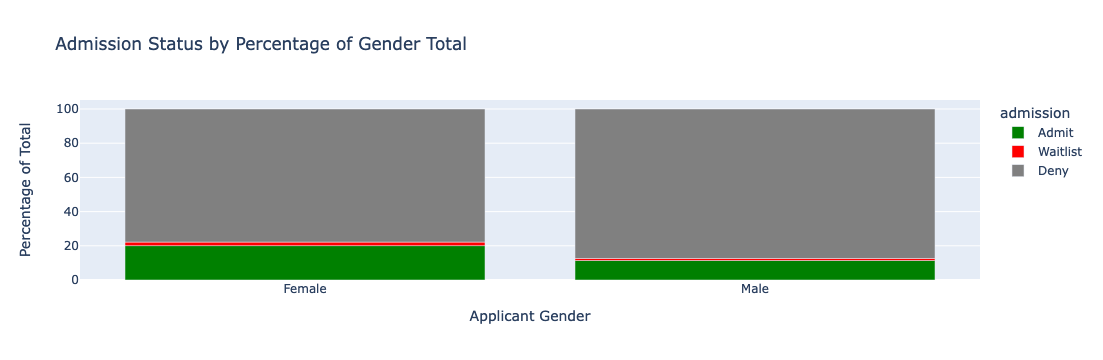

In [56]:
grouped_df = mba.groupby(['gender', 'admission']).size().reset_index(name='count')
grouped_df['group_sum']= grouped_df.groupby('gender')['count'].transform('sum')
grouped_df['percentage'] = round((grouped_df['count'] / grouped_df['group_sum']),3) * 100
admission_order = ['Admit', 'Waitlist', 'Deny']


fig3 = px.bar(grouped_df, 
             x='gender', 
             y='percentage', 
             color='admission', 
             title='Admission Status by Percentage of Gender Total',
             labels={'percentage': 'Percentage of Total', 'gender': 'Applicant Gender'},
             color_discrete_map={'Admit': 'green', 'Deny': 'grey', 'Waitlist': 'red'},
             category_orders={'admission': admission_order})

fig3.show()

In [57]:
grouped_gmat = mba.groupby(['gender', 'gmat', 'admission']).size().reset_index(name='count')
grouped_gmat['group_sum']= grouped_gmat.groupby(['gender', 'gmat'])['count'].transform('sum')
grouped_gmat['percentage'] = round((grouped_gmat['count'] / grouped_gmat['group_sum']),3) * 100
grouped_gmat

gender   gmat admission  count  group_sum  percentage
0    Female  570.0     Admit      6        151         4.0
1    Female  570.0      Deny    145        151        96.0
2    Female  580.0     Admit      6         84         7.1
3    Female  580.0      Deny     77         84        91.7
4    Female  580.0  Waitlist      1         84         1.2
..      ...    ...       ...    ...        ...         ...
103    Male  770.0      Deny     11         24        45.8
104    Male  770.0  Waitlist      1         24         4.2
105    Male  780.0     Admit     11         36        30.6
106    Male  780.0      Deny     24         36        66.7
107    Male  780.0  Waitlist      1         36         2.8

[108 rows x 6 columns]

In [58]:
fig_4a = px.bar(grouped_gmat[grouped_gmat['gender']=='Female'], 
             x='gmat', 
             y='percentage', 
             color='admission', 
             title='Admission Status by GMAT for Female Applicants',
             labels={'percentage': 'Percentage of Total', 'gmat': 'GMAT Score'},
                barmode='stack',
             color_discrete_map={'Admit': 'green', 'Deny': 'grey', 'Waitlist': 'red'},
             category_orders={'admission': admission_order})

fig_4b = px.bar(grouped_gmat[grouped_gmat['gender']=='Male'], 
             x='gmat', 
             y='percentage', 
             color='admission', 
             title='Admission Status by GMAT for Male Applicants',
             labels={'percentage': 'Percentage of Total', 'gmat': 'GMAT Score'},
            barmode='stack', 
             color_discrete_map={'Admit': 'green', 'Deny': 'grey', 'Waitlist': 'red'},
             category_orders={'admission': admission_order})

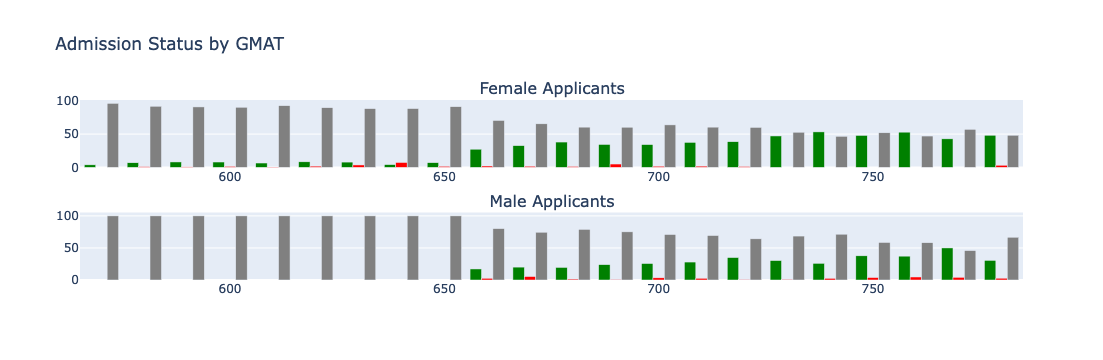

In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 2 rows, 1 column
fig4 = make_subplots(rows=2, cols=1, subplot_titles=('Female Applicants', 'Male Applicants'))

# Add first plot (grouped bar chart) to the first subplot (row 1, col 1)
for trace in fig_4a.data:
    fig4.add_trace(trace, row=1, col=1)

# Add second plot (stacked bar chart) to the second subplot (row 2, col 1)
for trace in fig_4b.data:
    fig4.add_trace(trace, row=2, col=1)

fig4.update_layout(title_text='Admission Status by GMAT', showlegend=False)
fig4.show()


Above chart shows that applicants can see their chances of being accepted given their GMAT Score and Gender. 